In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
from numpy import log

traindf= pd.read_csv("Datasets/observations_train.csv")
testdf= pd.read_csv("Datasets/observations_test.csv")

In [108]:
for series, df_series in traindf.groupby('series_id'):
    name_df = series
    exec(name_df + " = df_series")

In [109]:
SP500.head()

,series_id,date,value
84020,SP500,02-14-2011 00:00:00,1332.32
84021,SP500,02-15-2011 00:00:00,1328.01
84022,SP500,02-16-2011 00:00:00,1336.32
84023,SP500,02-17-2011 00:00:00,1340.43
84024,SP500,02-18-2011 00:00:00,1343.01


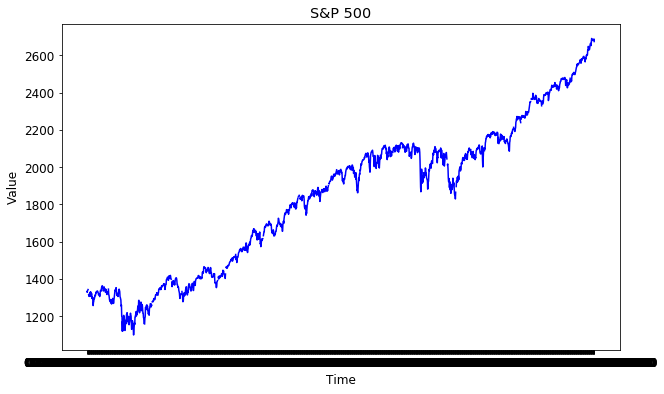

In [63]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(SP500.date, SP500.value, color='blue')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('S&P 500');

In [105]:
SP500.to_csv("SP500.csv")

In [88]:
result = adfuller(SP500.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.370067
p-value: 0.980340


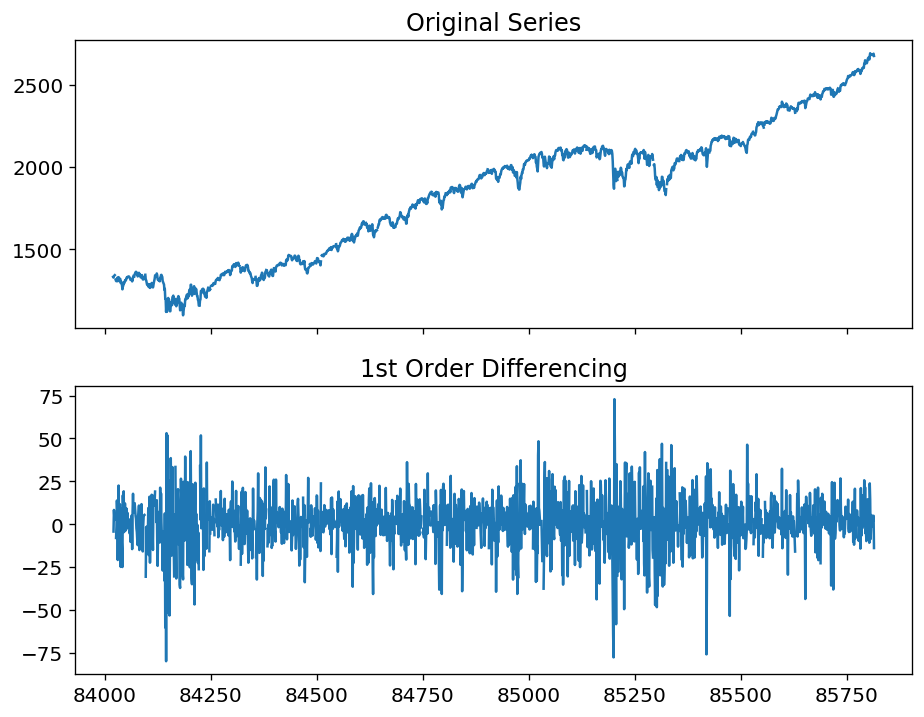

In [89]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(SP500.value); axes[0].set_title('Original Series')

# 1st Differencing
axes[1].plot(SP500.value.diff()); axes[1].set_title('1st Order Differencing')

plt.show()

Source: https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [90]:
result = adfuller(SP500.value.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -12.295660
p-value: 0.000000


Check R code to see how I used auto.arima to find best ARIMA model (p=2,d=1,q=2)

In [112]:
# Build Model
model = ARIMA(SP500.value, order=(2, 1 ,2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


C:\Users\erikj\Anaconda3new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  base index (or the model's index if the base index was not given) and
C:\Users\erikj\Anaconda3new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  base index (or the model's index if the base index was not given) and


MissingDataError: exog contains inf or nans